In [1]:
# -*- coding: utf-8 -*-
import os 
import pygame
import cv2
import codecs
import time

from PIL import Image
# import pytesseract
from PIL import Image, ImageFilter
from strTools import *
import random
import argparse
from tqdm import tqdm

from handler import * 

pygame 2.1.2 (SDL 2.0.16, Python 3.6.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
file_path = "dummy.txt"
save_path = "dummy_save.txt"

In [3]:
# with codecs.open(file_path, "r", "utf-8") as file:
#     for line in file.readlines():
#         character = line.strip()
#         print(character)
#         characterToimage(word=character, imagename=character)

In [4]:
import torch
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

def get_tensor_by_char(character):
    img_path = "./chn-char-lib/" + character + ".png"
    img = np.array(Image.open(img_path))
    img_data = torch.Tensor(img) # [w, h, channel]
    return img_data

/home/y212202031/.conda/envs/corpus_gen/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


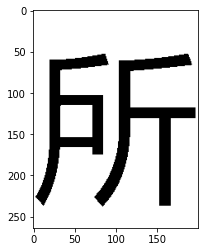

In [5]:
plt.imshow(get_tensor_by_char("所"))

In [6]:
compared_chars = ["为", "所", "欲", "为"]

query_char_data = get_tensor_by_char("为").permute(2, 1, 0) # -> [channel, h, w]

query_char_data.shape

torch.Size([3, 200, 264])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


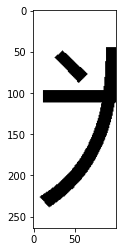

In [7]:
query_char_data = query_char_data[:, :100, :]
plt.imshow(query_char_data.permute(2, 1, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


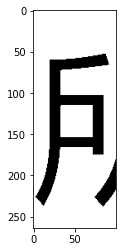

In [8]:
test_char_data = get_tensor_by_char("所").permute(2, 1, 0) # [3, 200, 264]
test_char_data = test_char_data[:, :100, :]
plt.imshow(test_char_data.permute(2, 1, 0))

In [9]:
# [3, 100, 264] -> [100, 264]
query_char_data = query_char_data[0, :, :]
test_char_data = test_char_data[0, :, :] 

In [10]:
def corr2d(X, K): 
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [11]:
X = torch.Tensor([[1, 2], [1, 1]])
K = torch.Tensor([[1, 1], [2, 1]])
corr2d(X, K)

tensor([[6.]])

In [12]:
qt_res = corr2d(query_char_data, test_char_data)
qq_res = corr2d(query_char_data, query_char_data)
torch.nn.functional.softmax(torch.Tensor([qt_res, qq_res, qq_res]))

/home/y212202031/.conda/envs/corpus_gen/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([0.0000, 0.5000, 0.5000])

In [ ]:
def my_min_max_scaler(input_tensor):
    min_in = torch.min(input_tensor)
    max_in = torch.max(input_tensor)
    return (input_tensor - min_in) / max_in

def my_softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

query_char_data = get_tensor_by_char("关").permute(2, 1, 0)[0, :, :]
test1_char_data = get_tensor_by_char("并").permute(2, 1, 0)[0, :, :]
test2_char_data = get_tensor_by_char("为").permute(2, 1, 0)[0, :, :]
qt1_res = corr2d(query_char_data, test1_char_data)
qt2_res = corr2d(query_char_data, test2_char_data)
qq_res = corr2d(query_char_data, query_char_data)
my_softmax(torch.Tensor([qt1_res, qt2_res, 0]))
# torch.nn.functional.softmax(torch.Tensor([qt1_res, qt2_res, 0]), dim=-1)
# my_min_max_scaler(torch.Tensor([qt1_res, qt2_res, 0]))

In [ ]:
# qt1_res, qt2_res, qq_res